## Q2
Considere dados apresentados na tabela abaixo referentes aos índices de
desenvolvimento de países (Fonte: ONU- 2002, Livro – Análise de dados através de
métodos de estatística multivariada – Sueli A. Mingoti) . Utilize uma rede neural de
Kohonen ou Mapa Auto Organizável (SOM) para identificar os aglomerados (clusters) dos
países com indicadores mais similares. Como sugestão considere um SOM bidimensional
com vizinhança hexagonal com 20x20 neurônios.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [8]:
df = pd.read_csv('./dataset.csv')
df = df.drop(columns=['Países'])
df.head()

,Expectativa de Vida,Educação,PIB,Estabilidade Política
0,0.88,0.99,0.91,1.10
1,0.90,0.99,0.93,1.26
2,0.90,0.98,0.94,1.24
3,0.87,0.98,0.97,1.18
4,0.93,0.93,0.93,1.20


In [9]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler on the dataframe
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Print the scaled dataframe
df_scaled.head()

,Expectativa de Vida,Educação,PIB,Estabilidade Política
0,0.928571,1.000000,0.914286,0.908555
1,0.957143,1.000000,0.942857,0.955752
2,0.957143,0.984848,0.957143,0.949853
3,0.914286,0.984848,1.000000,0.932153
4,1.000000,0.909091,0.942857,0.938053


In [10]:
# Inicializando a SOM
som_shape = (20, 20)  # Tamanho do grid da SOM
som = MiniSom(som_shape[0], som_shape[1], df_scaled.shape[1], sigma=0.3, learning_rate=0.5)

In [18]:
# Treinamento da SOM
som.random_weights_init(df_scaled.values)
som.train_random(df_scaled.values, 10000)

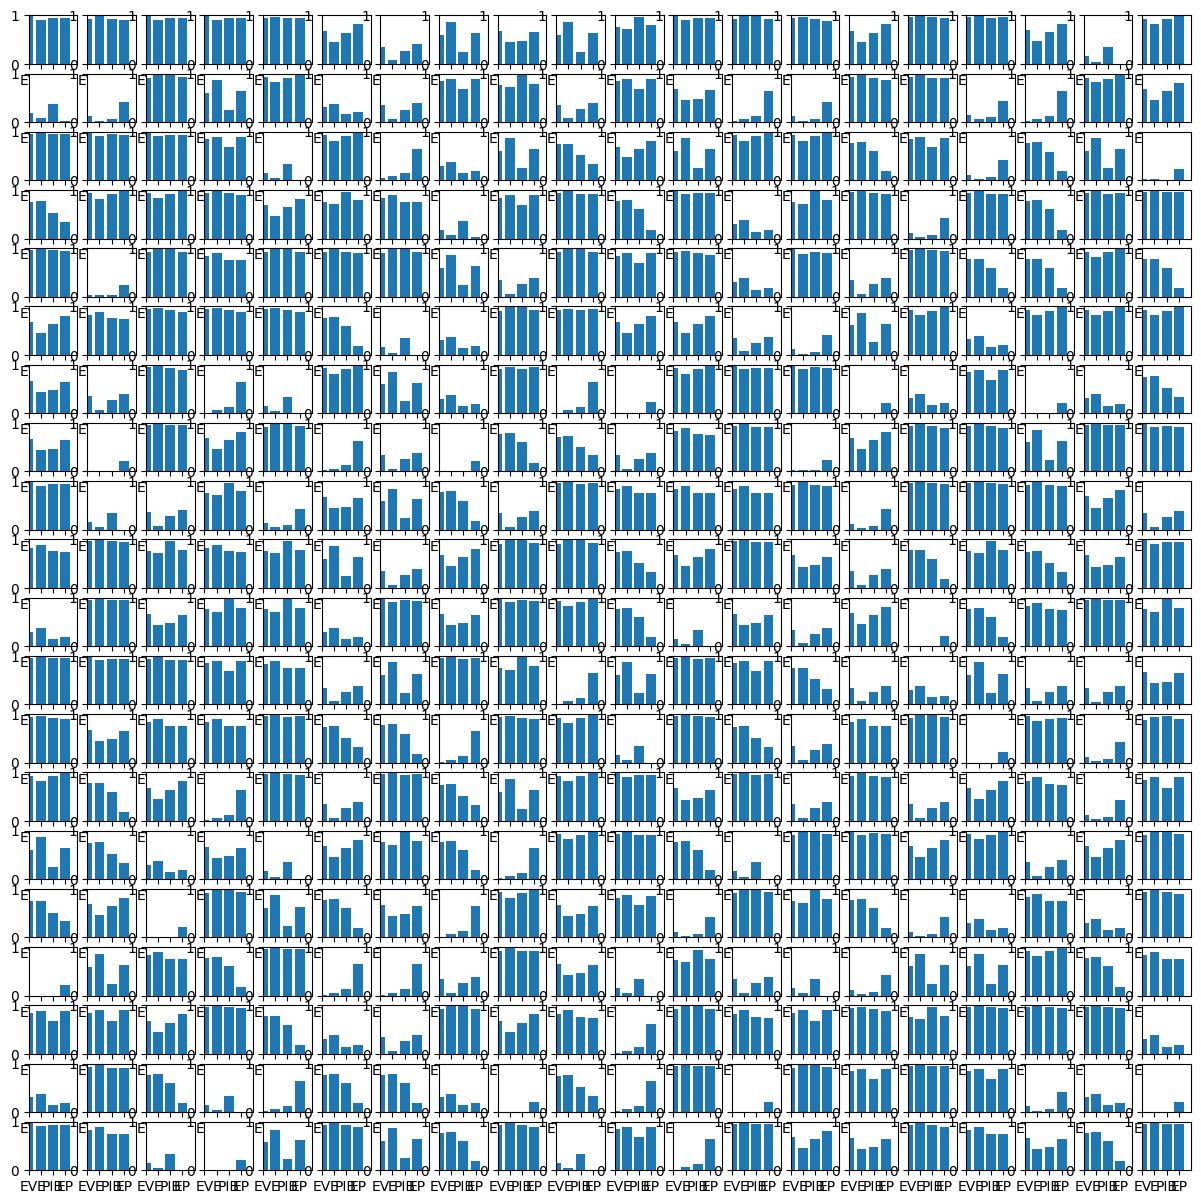

In [20]:
# Obtem o vetor de pesos da rede treinada
pesos = som.get_weights()

# Mostra todos os pesos
cont = 1;
x = ['EV','E', 'PIB', 'EP']
plt.figure(figsize=(15,15))
for row in pesos:
  for elem in row:
    plt.subplot(20,20,cont)
    cont=cont+1
    plt.axis([0, 4, 0, 1])
    plt.bar(x, elem)
    
plt.show()

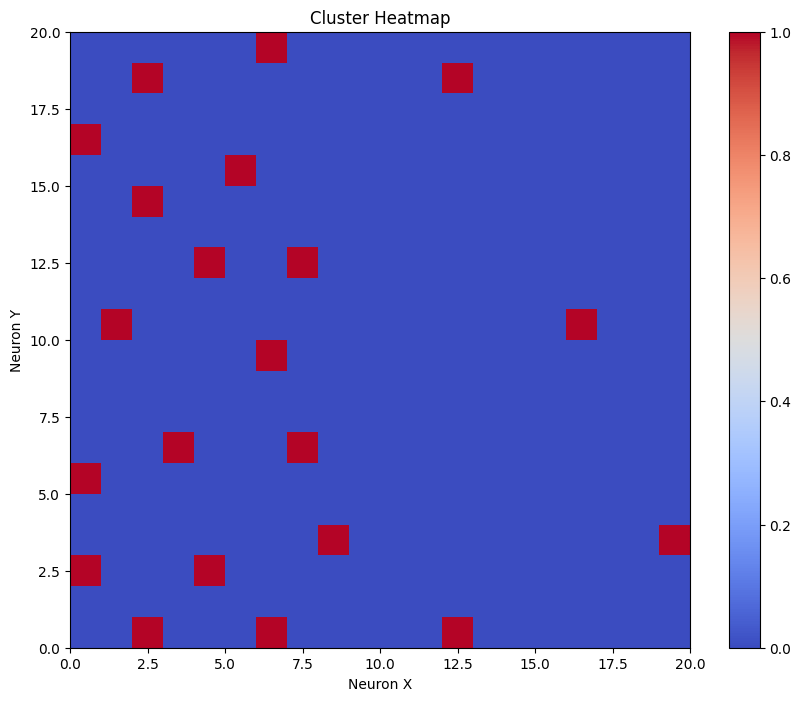

In [21]:
import seaborn as sns
# Get the activation map of the SOM
activation_map = som.activation_response(df_scaled.values)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
heatmap = ax.pcolormesh(activation_map.T, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the title and labels
ax.set_title('Cluster Heatmap')
ax.set_xlabel('Neuron X')
ax.set_ylabel('Neuron Y')

# Show the plot
plt.show()